# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `5` | `Questions`

> Hi, Team 👋

> The purpose of the current exercise problem sets is to consolidate and expand the understanding of algorithmic trading tool kits that you have developed in the course.

> Building on what you have learned thus far, these problem sets will ask you to create trading strategies, capitalizing on commonly used technical indicators.

> Please submit your answers via the submission portal at eLearn. Again, it would be a good practice to attempt to answer these questions within the designated time limit.

> As with the previous exercise problem sets, the questions are written in such a way that helps advance your learning, rather than testing you.

> Enjoy🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a strategy based on one kind of momentum strategy called the `Moving Average Convergence Divergence` (MACD) crossover.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Apple (AAPL) as our security of interest, over the three-year period of 2015 through 2017.

#### Moving Average Convergence Divergence (`MACD`) is a lagging, trend-following momentum indicator reflecting the relationship between two moving averages of stock prices.

#### The strategy utilizes two indicators, the MACD and the MACD signal line:

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD `signal line` is then defined as the `9`-day ***exponential*** moving average of the MACD.

### <font color = green> NOTE: The MACD crossover strategy is defined as:

- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [3]:
def download_data(
    ticker: str
    ) -> pd.DataFrame:
    return (
        yf.download(
            ticker,
            start = '2015-01-01',
            end = '2017-12-31'
        )
        [['Adj Close']]
    )

In [4]:
aapl = download_data('AAPL')

[*********************100%***********************]  1 of 1 completed


In [5]:
def compute_MACD(
    df: pd.DataFrame, 
    span: list[int, int, int]
    ) -> pd.DataFrame:
    
    df[f'{span[0]}_ewma'] = (
        df
        ['Adj Close']
        .ewm(span = span[0])
        .mean()
    )
    
    df[f'{span[1]}_ewma'] = (
        df
        ['Adj Close']
        .ewm(span = span[1])
        .mean()
    )
    
    df['MACD'] = (
        df
        .eval(
            '`12_ewma` - `26_ewma`'
        )
    )
    
    df['signal_line'] = (
        df
        ['MACD']
        .ewm(span = span[2])
        .mean()
    )
    return df

In [6]:
def generate_signal(
    df: pd.DataFrame
) -> pd.DataFrame:
    df['signal'] = (
        np.where(
            (df['MACD'] > df['signal_line']) &
            (df['MACD'].shift(1) < df['signal_line'].shift(1)),
            1, np.nan
        )
    )

    df['signal'] = (
        np.where(
            (df['MACD'] < df['signal_line']) &
            (df['MACD'].shift(1) > df['signal_line'].shift(1)),
            -1, df['signal']
        )
    )

    df['trading_position'] = (
        df
        ['signal']
        .ffill()
        .fillna(0)
    )
    
    return df

In [7]:
def visualize(
    df: pd.DataFrame,
    ticker: str,
    var: str
) -> None:
    (
        df
        [[var]]
        .plot(
            figsize = (16,6),
            color = 'grey'
        )
    )

    # BUY signal

    (
        plt
        .scatter(
            df.loc[df['trading_position'] == 1.0].index,
            df[df['trading_position'] == 1.0][var],
            color = "green",
            alpha = 0.5,
            )
    )

    # SELL signal

    (
        plt
        .scatter(
            df.loc[df['trading_position'] == -1.0].index,
            df[df['trading_position'] == -1.0][var],
            color = "red",
            alpha = 0.5
            )
    )
    
    plt.title(f'{ticker}')
    
def visualize_MACD(
    df: pd.DataFrame,
    var: str
) -> None:
    (
        df
        [['MACD', 'signal_line']]
        .plot(
            figsize = (16,6),
            color = ['blue', 'grey']
        )
    )

    # BUY signal

    (
        plt
        .scatter(
            df.loc[df['signal'] == 1.0].index,
            df[df['signal'] == 1.0][var],
            color = "green",
            alpha = 1,
            )
    )

    # SELL signal

    (
        plt
        .scatter(
            df.loc[df['signal'] == -1.0].index,
            df[df['signal'] == -1.0][var],
            color = "red",
            alpha = 1
            )
    )

In [8]:
aapl = compute_MACD(aapl, [12, 26, 9])
aapl = generate_signal(aapl)

In [9]:
aapl

,Adj Close,12_ewma,26_ewma,MACD,signal_line,signal,trading_position
Date,,,,,,,
2015-01-02,24.373957,24.373957,24.373957,0.000000,0.000000,NaN,0.0
2015-01-05,23.687304,24.002020,24.017425,-0.015406,-0.008559,NaN,0.0
2015-01-06,23.689537,23.880058,23.899618,-0.019561,-0.013068,NaN,0.0
2015-01-07,24.021711,23.924772,23.933750,-0.008978,-0.011682,1.0,1.0
2015-01-08,24.944683,24.201878,24.168190,0.033689,0.001815,NaN,1.0
...,...,...,...,...,...,...,...
2017-12-22,41.216579,40.878417,40.501302,0.377115,0.346860,NaN,1.0
2017-12-26,40.170929,40.769573,40.476830,0.292743,0.336037,-1.0,-1.0
2017-12-27,40.177979,40.678559,40.454693,0.223865,0.313602,NaN,-1.0


### <font color = red> Answer 1 is presented in the cell below: </font>

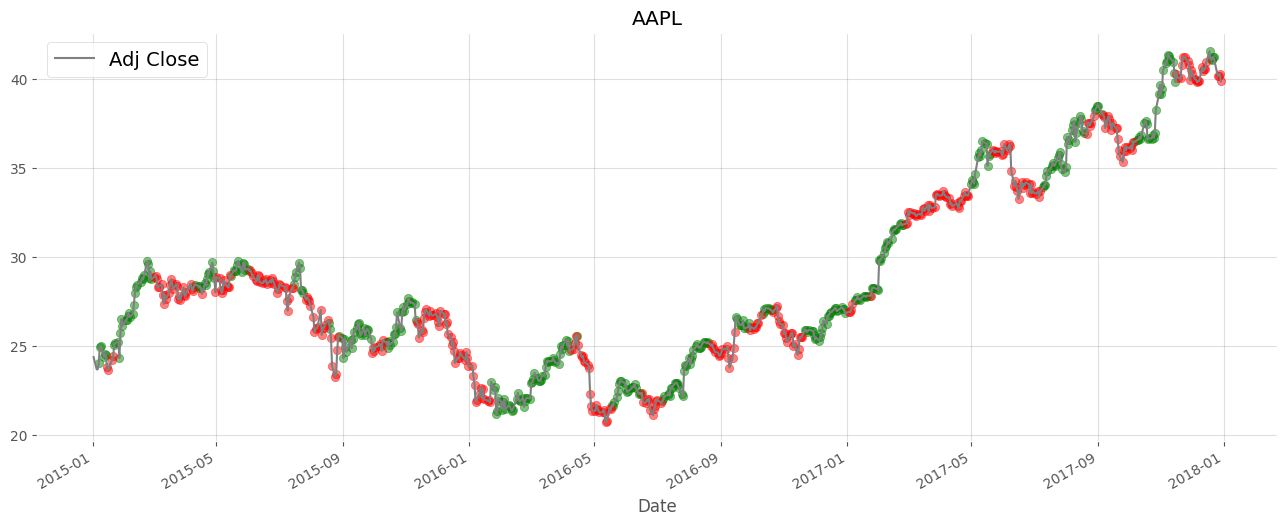

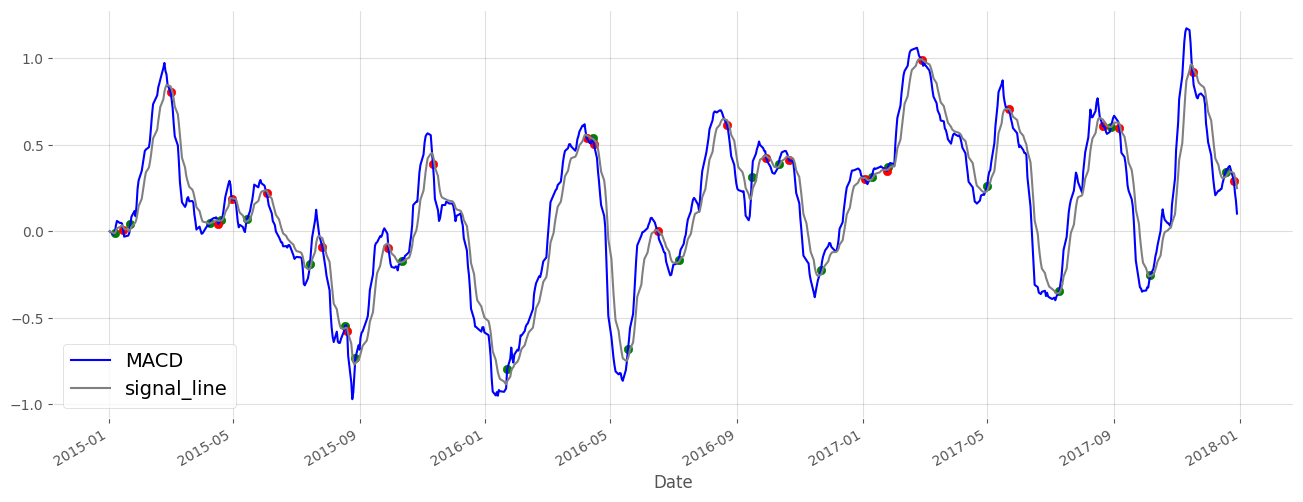

In [10]:
visualize(aapl,'AAPL', 'Adj Close')
visualize_MACD(aapl, 'MACD')

### <font color = blue> 👉 Question 2</font>. Let’s suppose that you started from a $100,000 capital base for the given security.

### Given a $5 fixed commission fee per trade, how much in cumulative returns could you have had as a result of the MACD crossover strategy?

### Below are the lines of code that lead to an answer:

In [11]:
def compute_portfolio(
    df: pd.DataFrame
    ) -> pd.DataFrame:
    capital = 1e5
    commission = 5

    position = (
        pd
        .DataFrame(index = df.index)
        .fillna(0.0)
    )

    position["df"] = (
        100
        *
        df['trading_position'].fillna(0)
    )

    position['comms'] = (
        np.where(
            df
            ['trading_position']
            .fillna(0)
            .diff() # check change in L/S
            .fillna(0) 
            != 0,
            -commission, 0
        )
    )

    portfolio = (
        position[['df']]
        .multiply(
            df['Adj Close'], 
            axis = 0
        )
    )

    difference_in_shares_owned = (
        position[['df']]
        .diff()
    )

    portfolio["our_holdings"] = (
        position[['df']]
        .multiply(df['Adj Close'],
                axis = 0)
    ).sum(axis = 1)

    portfolio["our_cash"] = (
        capital 
        - 
        (
            difference_in_shares_owned
            .multiply(df['Adj Close'], axis = 0)
            .sum(axis = 1)
        )
        .cumsum()
        +
        position['comms'].cumsum()
    )

    portfolio["total"] = portfolio["our_cash"] + portfolio["our_holdings"]

    portfolio["returns"] = (
        portfolio
        ["total"]
        .pct_change()
    )

    portfolio['cumulative_returns'] = (
        (
            portfolio
            ['returns'] 
            + 1
        )
        .cumprod()
    )

    portfolio['trading_position'] = df['trading_position']

    return portfolio

In [12]:
portfolio = compute_portfolio(aapl)
portfolio

,df,our_holdings,our_cash,total,returns,cumulative_returns,trading_position
Date,,,,,,,
2015-01-02,0.000000,0.000000,100000.000000,100000.000000,NaN,NaN,0.0
2015-01-05,0.000000,0.000000,100000.000000,100000.000000,0.000000,1.000000,0.0
2015-01-06,0.000000,0.000000,100000.000000,100000.000000,0.000000,1.000000,0.0
2015-01-07,2402.171135,2402.171135,97592.828865,99995.000000,-0.000050,0.999950,1.0
2015-01-08,2494.468307,2494.468307,97592.828865,100087.297173,0.000923,1.000873,1.0
...,...,...,...,...,...,...,...
2017-12-22,4121.657944,4121.657944,97681.977654,101803.635597,0.000000,1.018036,1.0
2017-12-26,-4017.092896,-4017.092896,105711.163445,101694.070549,-0.001076,1.016941,-1.0
2017-12-27,-4017.797852,-4017.797852,105711.163445,101693.365593,-0.000007,1.016934,-1.0


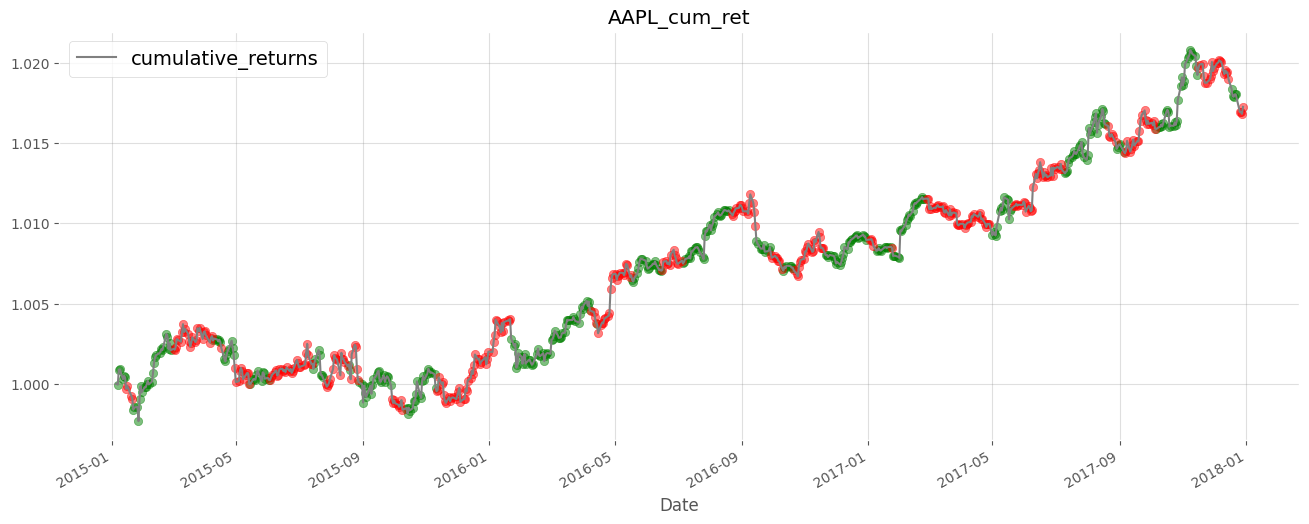

In [13]:
visualize(portfolio, 'AAPL_cum_ret', 'cumulative_returns')

### <font color = red> Answer 2 </font>

    The answer is 1.73 % .

### <font color = blue> 👉 Question 3</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [14]:
def compute_drawdown(
    df: pd.DataFrame
    ) -> dict[float, float]:
    df['max_gross_return'] = df['cumulative_returns'].cummax()
    df['drawdown'] = (df['cumulative_returns'] / df['max_gross_return']) - 1

    drawdown_reset = df[df['drawdown'] == 0].index
    drawdown_reset = (
        np.append(
            drawdown_reset,
            df.index[-1:]
        )
    )

    drawdowns = {}
    for i in range(1, len(drawdown_reset)):
        filtered_df = (
            df
            [
                (df.index >= drawdown_reset[i-1])
                &
                (df.index <= drawdown_reset[i])
            ]
        )
        
        mdd = filtered_df['drawdown'].min()
        duration = (drawdown_reset[i] - drawdown_reset[i-1]) / np.timedelta64(1, 'D')

        drawdowns[mdd] = duration
    
    sorted_drawdown = dict(sorted(drawdowns.items()))
    
    return sorted_drawdown


In [15]:
drawdowns = compute_drawdown(portfolio)

In [16]:
counter = 0
for i, j in drawdowns.items():
    if counter !=5:
        print(f'{counter+1} worst drawdown period: Net drawdown {round(i*100, 2)}% | Duration: {int(j)} Days')
        counter +=1
    else:
        break

1 worst drawdown period: Net drawdown -0.55% | Duration: 302 Days
2 worst drawdown period: Net drawdown -0.51% | Duration: 273 Days
3 worst drawdown period: Net drawdown -0.39% | Duration: 51 Days
4 worst drawdown period: Net drawdown -0.32% | Duration: 33 Days
5 worst drawdown period: Net drawdown -0.3% | Duration: 61 Days


### <font color = red> Answer 3 </font>

    The Worst drawdown period     : Net drawdown ____________ % | Duration ____________ Days
    
    The 2nd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
     
    The 3rd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
         
    The 4th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
    
    The 5th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days

### <font color = blue> 👉 Question 4</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [17]:
def compute_annual_returns(
    df: pd.DataFrame
) -> pd.DataFrame:
    portfolio['year'] = portfolio.index.year

    portfolio_by_year = (
        portfolio
        .groupby('year')
        .agg(
            start = ('total', 'first'),
            end = ('total', 'last')
        )
    )

    portfolio_by_year['returns'] = (
        portfolio_by_year
        .eval(
            '`end` / `start` - 1'
        )
    )

    portfolio_by_year['avg'] = portfolio_by_year['returns'].mean()

    portfolio_by_year['perf'] = (
        np.where(
            portfolio_by_year['returns'] > portfolio_by_year['avg'], 
            1, 
            -1
        )
    )

    return portfolio_by_year

In [18]:
portfolio_by_year = compute_annual_returns(portfolio)
portfolio_by_year

,start,end,returns,avg,perf
year,,,,,
2015,100000.000000,100200.131760,0.002001,0.005721,-1
2016,100198.091660,100896.354027,0.006969,0.005721,1
2017,100899.003067,101725.629539,0.008193,0.005721,1


### <font color = red> Answer 4 </font>

    Below average year(s) : 2015 
    
    Above average year(s) : 2016 & 2017 
     

###  <font color = blue> 👉 Question 5. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [19]:
def compute_sharpe(
    df: pd.DataFrame
) -> float:
    return (
        df['returns'].mean()
        /
        df['returns'].std()
        *
        np.sqrt(252)
    )

In [20]:
compute_sharpe(portfolio)

0.9180914475571923

### <font color = red> Answer 5 </font>
    
    Sharpe ratio: 0.92
    

## 👇 Questions 6 to 10 ask you to answer the above questions using your `customized functions` to `scale up`.

### Below you will find the above questions repeated, but this time you need to compare the results across the following six stocks:

### `MSFT`

### `AMZN`

### `UAL`

### `DAL`

### `XOM`

### `CVX`

### <font color = green> NOTE: When answering the questions below, please hold all the conditions (i.e., investment horizon; capital base; deployment of `MACD crossover strategy`; the flat commission fee, etc.) constant, as you did above. 
    
### <font color = green> That is, the `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade. Given the iterative nature of the questions below, writing and using your customized functions will be helpful as you answer the questions.

###  <font color = blue> 👉 Question 6. </font>  Please visualize buy and sell positions for each of the six stocks. 

### Below are the lines of code that lead to an answer:

In [21]:
tickers = ['MSFT', 'AMZN', 'UAL', 'DAL', 'XOM', 'CVX']
portfolios = {}

### <font color = red> Answer 6 is presented in the cell below: </font>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


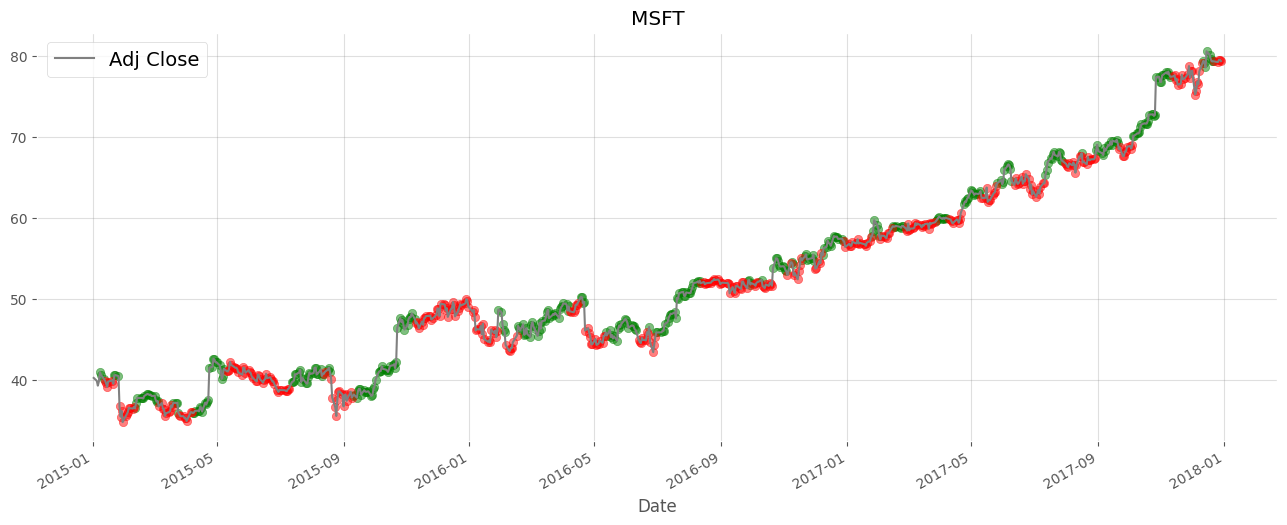

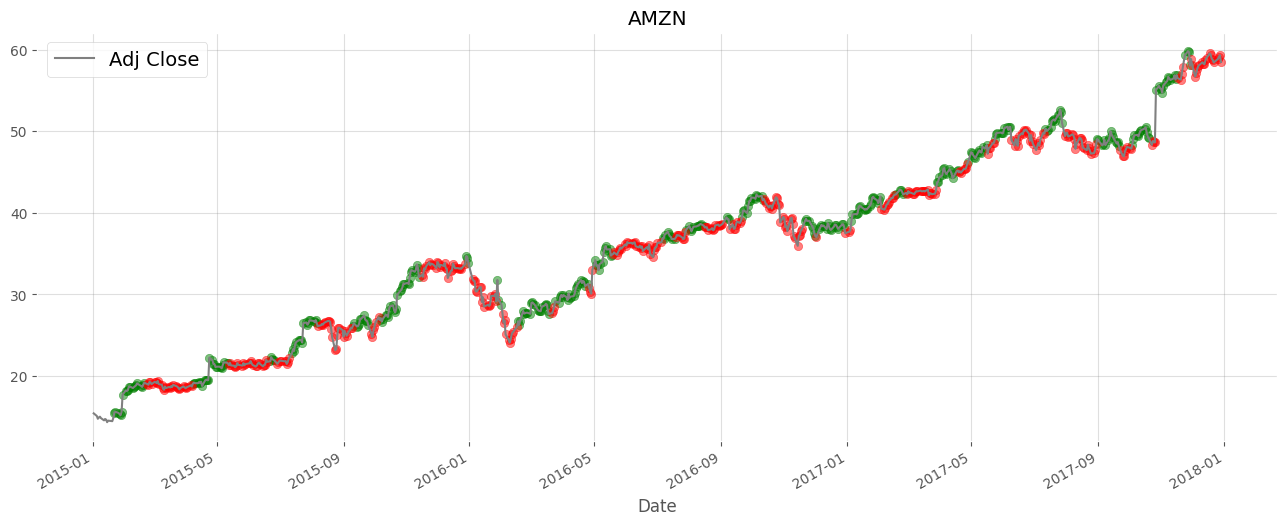

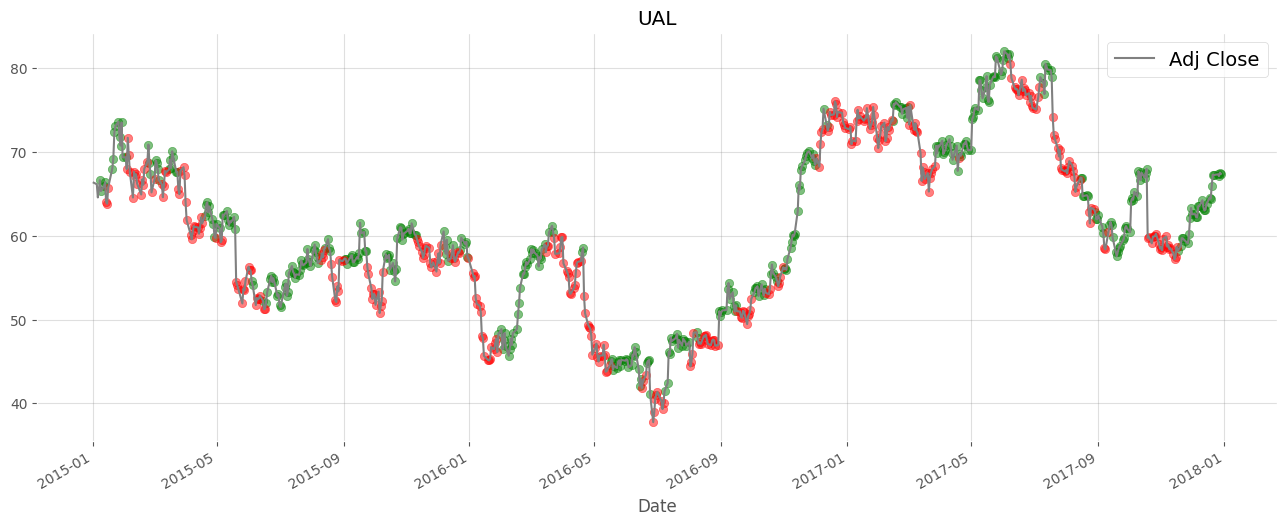

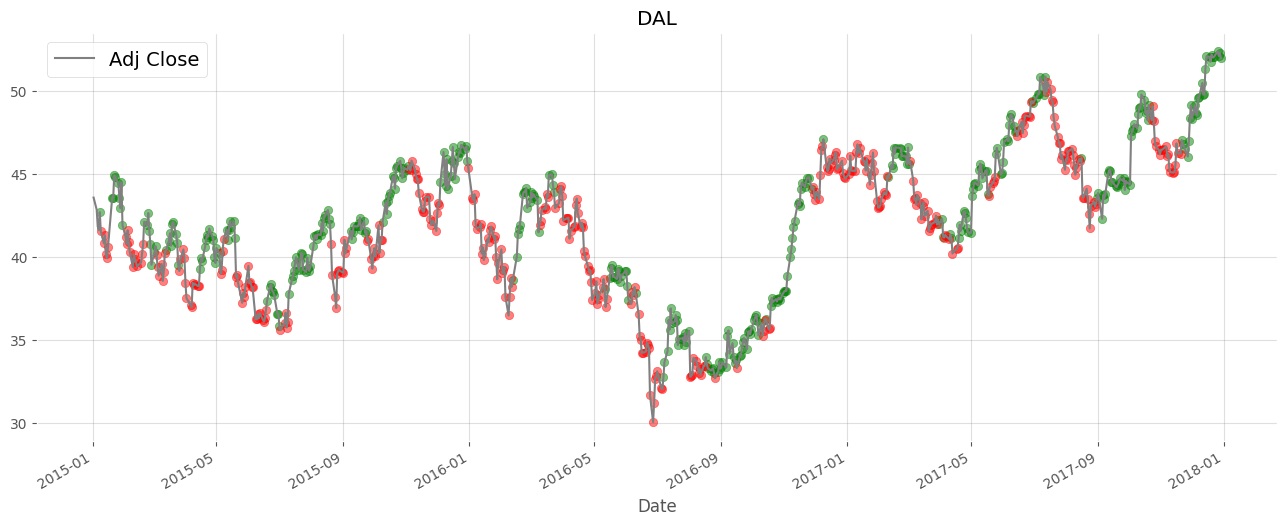

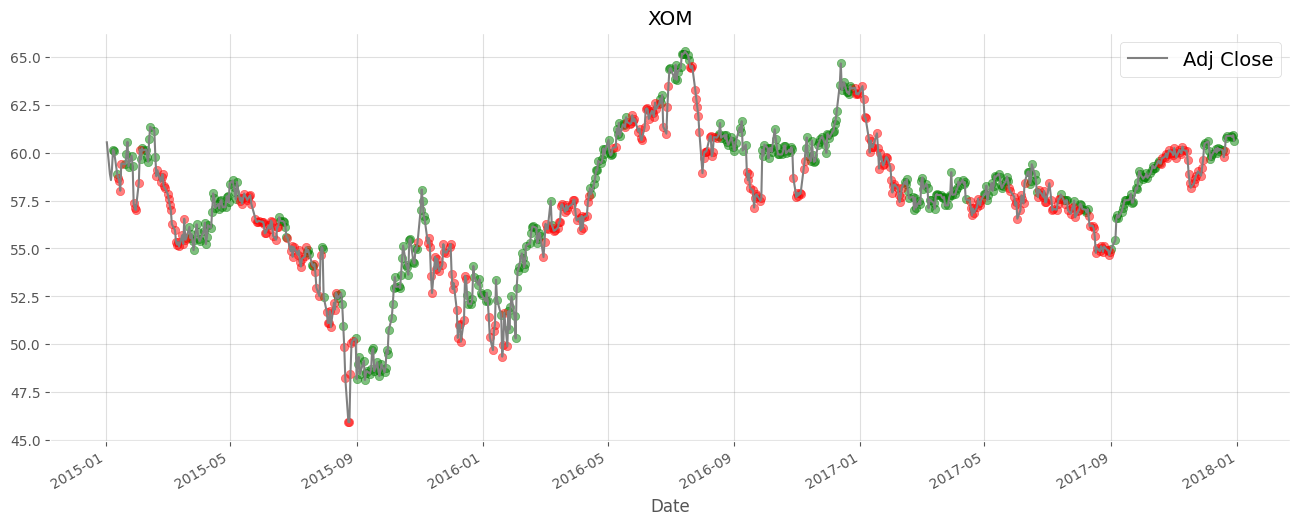

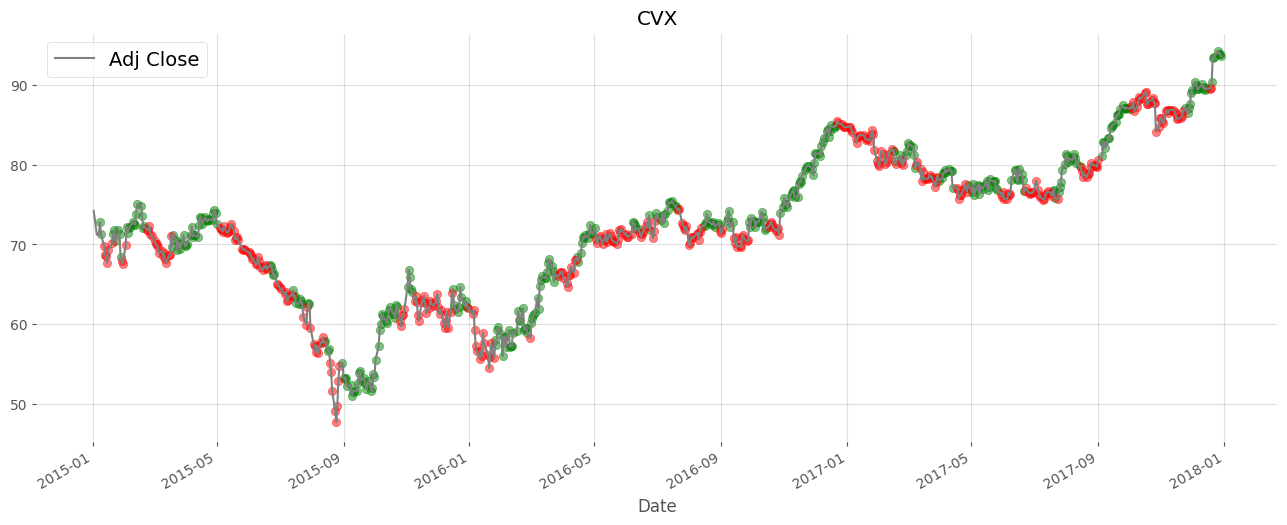

In [22]:
for ticker in tickers:
    price = download_data(ticker)
    price = compute_MACD(price, [12, 26, 9])
    price = generate_signal(price)
    portfolios[ticker] = price
    visualize(price, ticker, 'Adj Close')

###  <font color = blue> 👉 Question 7. </font> Which of the six stocks performs the best, based on cumulative returns?

### Below are the lines of code that lead to an answer:

In [23]:
for ticker, portfolio in portfolios.items():
    portfolios[ticker] = compute_portfolio(portfolio)
    ticker_cum_ret = (
        (
            compute_portfolio(portfolio)
            ["cumulative_returns"]
            .iloc[-1] 
            - 1
        ) * 100
    ).__round__(2)
    print(f'{ticker} Strategy cumulative returns: {ticker_cum_ret}%')

MSFT Strategy cumulative returns: -2.24%
AMZN Strategy cumulative returns: -2.36%
UAL Strategy cumulative returns: -5.32%
DAL Strategy cumulative returns: 0.23%
XOM Strategy cumulative returns: -2.71%
CVX Strategy cumulative returns: -1.58%


### <font color = red> Answer 7 </font>

    The answer is DAL .

###  <font color = blue> 👉 Question 8. </font> Which of the stocks displays the worst max drawdown, based on net drawdown % and the number of days?

### Below are the lines of code that lead to an answer:

In [24]:
for ticker, portfolio in portfolios.items():
    dd = compute_drawdown(portfolio)
    print(f'{ticker}: maxdd = {round((next(iter(dd.items()))[0]) * 100, 2)}%, days = {int(next(iter(dd.items()))[1])}')

MSFT: maxdd = -3.84%, days = 708
AMZN: maxdd = -3.5%, days = 779
UAL: maxdd = -6.92%, days = 1087
DAL: maxdd = -1.95%, days = 1061
XOM: maxdd = -3.11%, days = 1087
CVX: maxdd = -3.08%, days = 1087


### <font color = red> Answer 8 </font>

    The answer is UAL .

###  <font color = blue> 👉 Question 9. </font> Looking at each of the six stocks’ annual returns, which year for which stocks shows the best performance?

### Below are the lines of code that lead to an answer:

In [25]:
for ticker, portfolio in portfolios.items():
    ann_ret = compute_annual_returns(portfolio)
    ann_ret = ann_ret.sort_values(by = 'returns', ascending = False)
    best = ann_ret['returns'].max()
    best_year = ann_ret.index[0]
    print(f'{ticker}: best returns = {round(best * 100, 2)}% {best_year}') 

MSFT: best returns = 0.69% 2015
AMZN: best returns = 0.61% 2015
UAL: best returns = 1.22% 2017
DAL: best returns = 1.26% 2017
XOM: best returns = 0.03% 2017
CVX: best returns = 0.29% 2017


### <font color = red> Answer 9 </font>

    The answer is DAL 2017 .

###  <font color = blue> 👉 Question 10. </font> Which of the six stocks make the current strategy investment performance? Please rank the seven stocks based on their annualized Sharpe ratio.

### Below are the lines of code that lead to an answer:

In [26]:
for ticker, portfolio in portfolios.items():
    sharpe = (
        compute_sharpe(portfolio)
    ).__round__(2)
    print(f'{ticker}: Annualized Sharpe = {sharpe}') 

MSFT: Annualized Sharpe = -0.69
AMZN: Annualized Sharpe = -0.85
UAL: Annualized Sharpe = -0.83
DAL: Annualized Sharpe = 0.07
XOM: Annualized Sharpe = -0.9
CVX: Annualized Sharpe = -0.35


### <font color = red> Answer 10 </font>

    MSFT ____________
    
    AMZN ____________

    UAL  ____________

    DAL  ____________

    XOM  ____________
    
    CVX  ____________

### <font color="green">"💯 Thank you for putting your efforts into the exercise problem sets 😊"</font>